# PRCP-1025-FlightPricePrediction

## Flight Fare prediction using machine learning
In this project, we will be analyzing the flight fare dataset using essential exploratory data analysis techniques then will draw some predictions about the price of the flight based on some features such as what type of airline it is, what is the arrival time, what is the departure time, what is the duration of the flight, source, destination and more.


1. EDA: Learn the complete process of EDA

2. Data analysis: Learn to withdraw some insights from the dataset both mathematically and visualize it.

3. Machine learning model: Learn to make a Machine learning model after the data preprocessing steps.

4. Comparing the models: We will be working on multiple models so that we could choose the best one for that we need to know the techniques of how to compare our model to choose the best one so we will be covering that also.


## Importing Libraries

In [1]:
# Import all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

## Importing dataset
1.Since data is in form of excel file we have to use pandas read_excel to load the data

2.After loading it is important to check the complete information of data as it can indication many of the hidden infomation such as null values in a column or a row.

3.Check whether any null values are there or not. if it is present then following can be done,

A.Imputing data using Imputation method in sklearn

B.Filling NaN values with mean, median and mode or remove Nan values

4.Describe data --> which can give statistical analysis

In [2]:
df=pd.read_excel("Flight_Fare.xlsx")

In [3]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
# to display all the columns of dataset
pd.set_option('display.max_columns',None) 

In [5]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [6]:
df.tail()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [7]:
df.shape

(10683, 11)

## Exploratory Data Analysis (EDA)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
# Looking ate the unique values of Categorical Features
print(df['Airline'].unique())
print(df['Date_of_Journey'].unique())
print(df['Source'].unique())
print(df['Destination'].unique())
print(df['Route'].unique())
print(df['Dep_Time'].unique())
print(df['Arrival_Time'].unique())
print(df['Duration'].unique())
print(df['Total_Stops'].unique())

['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']
['24/03/2019' '1/05/2019' '9/06/2019' '12/05/2019' '01/03/2019'
 '24/06/2019' '12/03/2019' '27/05/2019' '1/06/2019' '18/04/2019'
 '9/05/2019' '24/04/2019' '3/03/2019' '15/04/2019' '12/06/2019'
 '6/03/2019' '21/03/2019' '3/04/2019' '6/05/2019' '15/05/2019'
 '18/06/2019' '15/06/2019' '6/04/2019' '18/05/2019' '27/06/2019'
 '21/05/2019' '06/03/2019' '3/06/2019' '15/03/2019' '3/05/2019'
 '9/03/2019' '6/06/2019' '24/05/2019' '09/03/2019' '1/04/2019'
 '21/04/2019' '21/06/2019' '27/03/2019' '18/03/2019' '12/04/2019'
 '9/04/2019' '1/03/2019' '03/03/2019' '27/04/2019']
['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']
['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']
['BLR → DEL' 'CCU → IXR → BBI → BLR' 'DEL → LKO → BOM → COK'
 'CCU → NAG → BLR' 'BLR → NAG → DEL' 'CCU → BLR' 'BLR → BOM → DEL'

In [10]:
# Looking ate the number of unique values of Categorical Features
print(df['Airline'].nunique())
print(df['Date_of_Journey'].nunique())
print(df['Source'].nunique())
print(df['Destination'].nunique())
print(df['Route'].nunique())
print(df['Dep_Time'].nunique())
print(df['Arrival_Time'].nunique())
print(df['Duration'].nunique())
print(df['Total_Stops'].nunique())

12
44
5
6
128
222
1343
368
5


In [11]:
df.describe()
# Price is the only integer column
# All other columns are string/object type

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [12]:
# Price outlier check
Q1=df['Price'].quantile(0.25)
Q3=df['Price'].quantile(0.75)
IQR=Q3-Q1

print(Q1)
print(Q3)
print(IQR)

5277.0
12373.0
7096.0


In [13]:
df['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 45m     337
2h 55m     337
2h 35m     329
          ... 
31h 30m      1
30h 25m      1
42h 5m       1
4h 10m       1
47h 40m      1
Name: Duration, Length: 368, dtype: int64

In [14]:
# Checking the null values
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [15]:
# Dropping the NaN values to further preprocess the training data
df.dropna(inplace=True)

In [16]:
# after dropping the NAN values, we are not left with any NAN value in our columns
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## FEATURE ENGINEERING

From description we can see that Date_of_Journey is a object data type,
Therefore, we have to convert this datatype into timestamp so as to use this column properly for prediction

For this we require pandas to_datetime to convert object data type to datetime dtype.

.dt.day method will extract only day of that date
.dt.month method will extract only month of that date

In [17]:
df.Date_of_Journey

0        24/03/2019
1         1/05/2019
2         9/06/2019
3        12/05/2019
4        01/03/2019
            ...    
10678     9/04/2019
10679    27/04/2019
10680    27/04/2019
10681    01/03/2019
10682     9/05/2019
Name: Date_of_Journey, Length: 10682, dtype: object

In [18]:
# extracting information from 'date_of_journey' column and storing in new columns 'Journey_month' and 'journey_day'

df['Journey_day']= pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.day
df['Journey_month']= pd.to_datetime(df['Date_of_Journey'], format="%d/%m/%Y").dt.month
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3


In [19]:
# Since we have converted Date_of_Journey column into integer , we can drop it.
# we have extracted useful information from this column by creating new columns 'Journey_day' & 'Journey_month'
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [20]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [21]:
# Departure time is when plane leaves

# Extracting Hours from 'Dep_Time' column by creating a new column 'Dep_hour'
df["Dep_hour"]= pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.hour

# Extracting Minutes from 'Dep_Time' column by creating a new column 'Dep_min'
df["Dep_min"]= pd.to_datetime(df['Dep_Time'],format='%H:%M').dt.minute

In [22]:
# Now we can drop Dep_time columns also as we extracted useful information from it
df.drop(["Dep_Time"],axis=1,inplace=True)
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [23]:
# Arrival time is when the plane pulls up to the gate
# similarly we can extract useful information from 'Arrival_time' column also

# Extracting Hours from 'Arrival_Time' column by creating a new column 'Arr_hour'
df["Arr_hour"]= pd.to_datetime(df['Arrival_Time'],).dt.hour

# Extracting Minutes from 'Arrival_Time' column by creating a new column 'Arr_min'
df["Arr_min"]= pd.to_datetime(df['Arrival_Time']).dt.minute

# Now we can drop Arrival_time columns also as we extracted useful information from it
df.drop(["Arrival_Time"],axis=1,inplace=True)

In [24]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [25]:
# time taken by plane to reach destination is called Duration
# It is the difference between Departure and Arrial time

duration = list(df["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [26]:
# adding duration_hours and duration_mins to our dataframe
df['Duration_hours']= duration_hours
df['Duration_mins']= duration_mins

In [27]:
df.drop(['Duration'],axis=1,inplace=True)

In [28]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


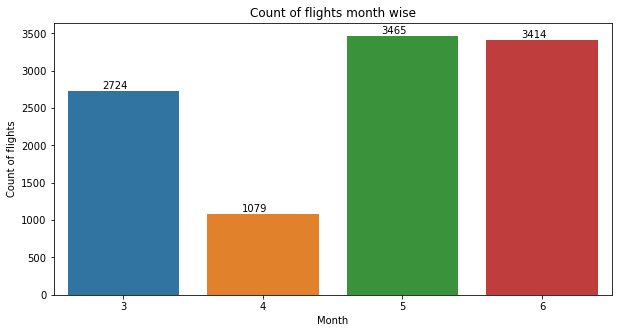

In [29]:
# Plotting Bar chart for Months (Duration) vs Number of Flights
plt.figure(figsize = (10, 5))
plt.title('Count of flights month wise')
ax=sns.countplot(x = 'Journey_month', data = df)
plt.xlabel('Month')
plt.ylabel('Count of flights')
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')

Inference: Here in the above graph we have plotted the count plot for journey in month vs number of flights and got to see that May has the most number of flights

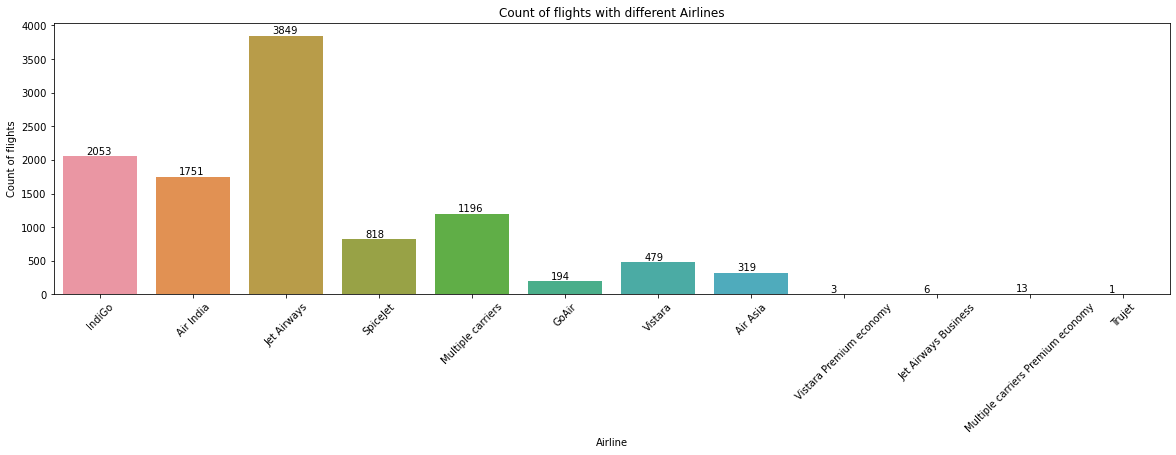

In [30]:
# Plotting Bar chart for Types of Airline vs Number of Flights
plt.figure(figsize = (20,5))
plt.title('Count of flights with different Airlines')
ax=sns.countplot(x = 'Airline', data = df)
plt.xlabel('Airline')
plt.ylabel('Count of flights')
plt.xticks(rotation = 45)
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x()+0.25, p.get_height()+1), va='bottom', color= 'black')


Inference: Now from the above graph we can see that between the type pf airline and count of flights we can see that Jet airways has the most flight boarded.

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

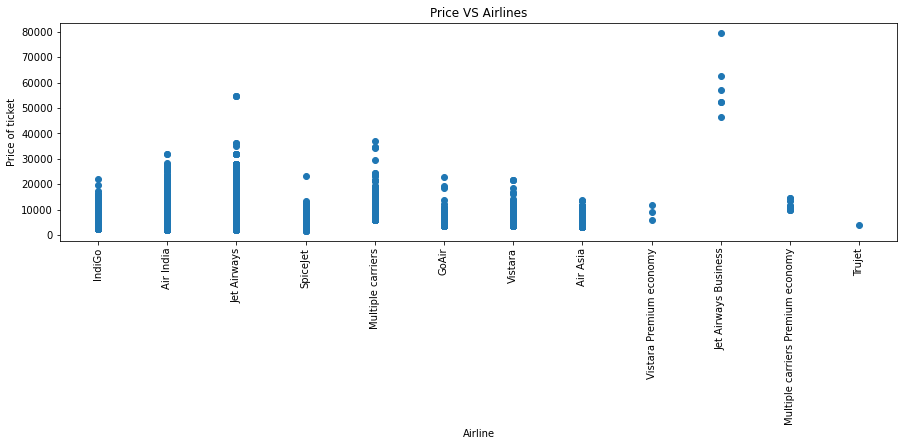

In [31]:
# Plotting Ticket Prices VS Airlines
plt.figure(figsize = (15,4))
plt.title('Price VS Airlines')
plt.scatter(df['Airline'], df['Price'])
plt.xticks
plt.xlabel('Airline')
plt.ylabel('Price of ticket')
plt.xticks(rotation = 90)

 # Handeling Categorical Data
One can find many ways to handle categorical data. Some of them categorical data are,

**Nominal data** --> data are not in any order--> **OneHotEncoder** is used in this case


**Ordinal data** --> data are in order --> **LabelEncoder** is used in this case

In [32]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

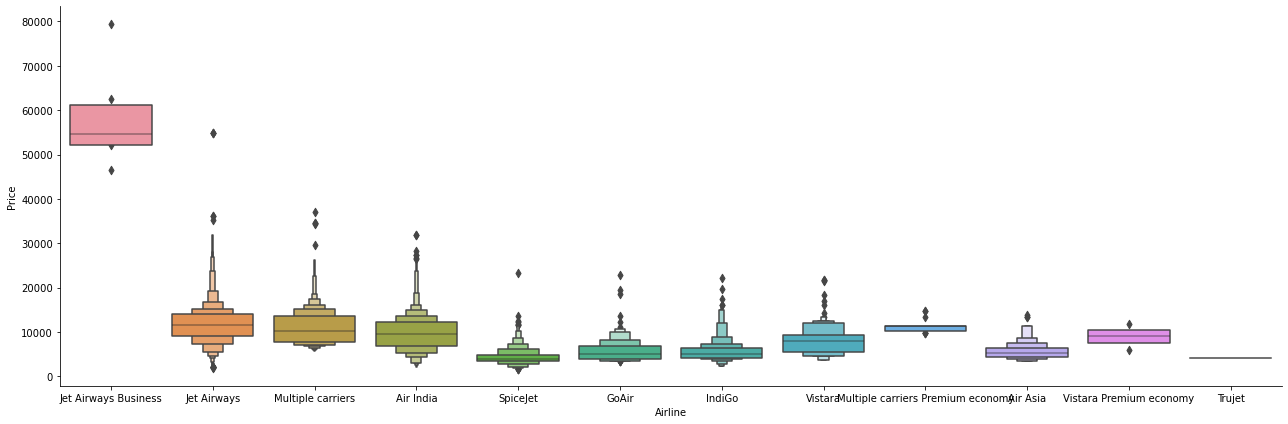

In [33]:
# from the diagram below we can see that jet Airways Business have the highest price
# apart from the first airline almost all are having similarmedian

# AIRLINE vs PRICE
sns.catplot(y='Price',x='Airline',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Inference: Here with the help of catplot we are trying to plot the boxplot between the price of the flight and airline and we can draw the conclusion that Jet airways has the most outliers in terms of price.

In [34]:
# As Airline column has nominal Categorical data , we will perform One Hot encoding
Airline=df[["Airline"]]
Airline= pd.get_dummies(Airline,drop_first=True)
Airline.head()

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [35]:
df['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

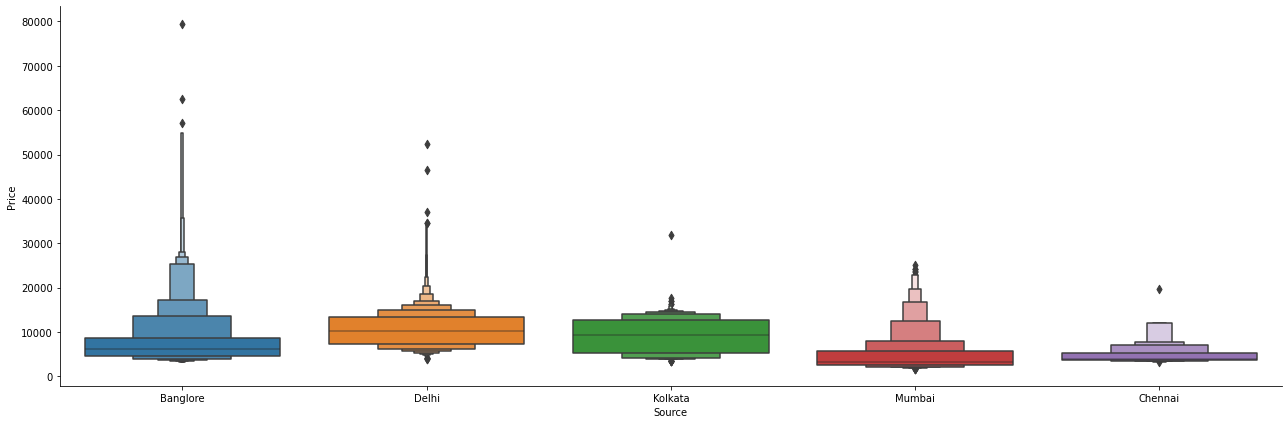

In [36]:
# Source vs PRICE
sns.catplot(y='Price',x='Source',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Inference: Now with the help of catplot we are plotting a box plot between the price of the flight and the source place i.e. the place from where passengers will travel to the destination and we can see that Banglore as the source location has the most outliers while Chennai has the least.

In [37]:
# as Source column has  nominal categorical data, we will perform OneHotEncoding

Source=df[["Source"]]
Source= pd.get_dummies(Source,drop_first=True)
Source.head()

,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [38]:
df['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

<function matplotlib.pyplot.show(close=None, block=None)>

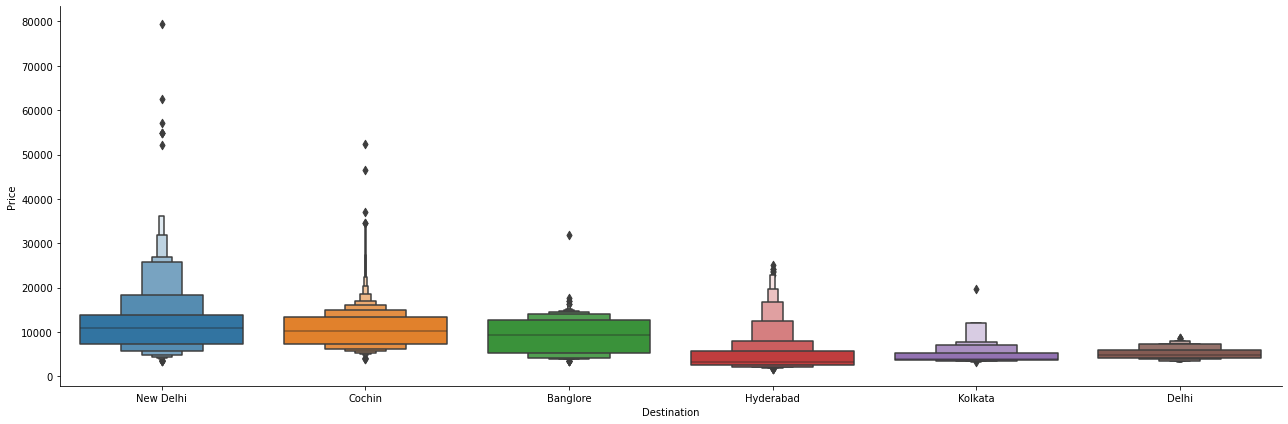

In [39]:
# Destination vs PRICE
sns.catplot(y='Price',x='Destination',data= df.sort_values('Price',ascending=False),kind="boxen",height=6, aspect=3)
plt.show

Inference: Here we are plotting the box plot with the help of catplot between price of the flight and destination to which passenger is travelling to and figured out that New delhi has the most outliers and Kolkata has the least

In [40]:
# as Destination column has  nominal categorical data, we will perform OneHotEncoding

Destination=df[["Destination"]]
Destination= pd.get_dummies(Destination,drop_first=True)
Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [41]:
df['Route']

0                    BLR → DEL
1        CCU → IXR → BBI → BLR
2        DEL → LKO → BOM → COK
3              CCU → NAG → BLR
4              BLR → NAG → DEL
                 ...          
10678                CCU → BLR
10679                CCU → BLR
10680                BLR → DEL
10681                BLR → DEL
10682    DEL → GOI → BOM → COK
Name: Route, Length: 10682, dtype: object

In [42]:
df["Total_Stops"].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [43]:
# 'Route' column and 'Total_stops' column convey same information.
# so we dropped'route' column
df.drop(["Route","Additional_Info"],axis=1,inplace=True)

In [44]:
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,non-stop,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45


In [45]:
# As total_stops column hs Ordinal Categorical type of data, So we perform Label Encoding
# Here values are assigned with corresponding keys

df.replace({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


## Feature Selection
Finding out the best features which will contribute and have good relation with our Target variable
Following are some feature selection methods: heatmap 

In [46]:
# dropping the unnecessary columns now
df.drop(["Airline","Source","Destination"],axis=1,inplace=True)
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins
0,0,3897,24,3,22,20,1,10,2,50
1,2,7662,1,5,5,50,13,15,7,25
2,2,13882,9,6,9,25,4,25,19,0
3,1,6218,12,5,18,5,23,30,5,25
4,1,13302,1,3,16,50,21,35,4,45


### Correlation between all Features

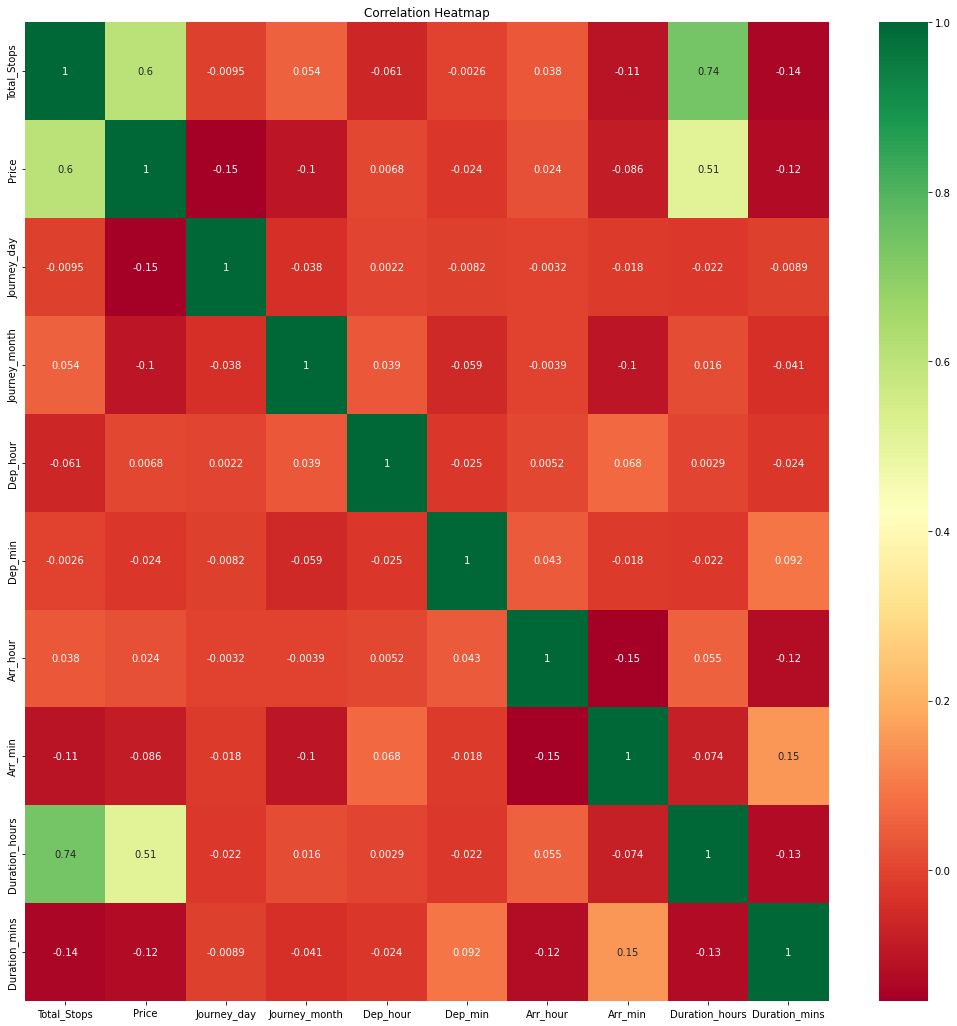

In [47]:
# Finding correlation betwwen Independent and Dependent Feature
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, cmap='RdYlGn')
plt.title('Correlation Heatmap')
plt.show()

Extreme green means highly correlated,

Extreme red means negatively correlated.

If two independent features are highly correlated , then we can drop any one of them as both are doing almost same task.**

In [48]:
# Concatenate dataframe --> train_data + airline + source and destination
df= pd.concat([df,Airline,Source,Destination],axis=1)
df.head()

,Total_Stops,Price,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 30 columns):
 #   Column                                     Non-Null Count  Dtype
---  ------                                     --------------  -----
 0   Total_Stops                                10682 non-null  int64
 1   Price                                      10682 non-null  int64
 2   Journey_day                                10682 non-null  int64
 3   Journey_month                              10682 non-null  int64
 4   Dep_hour                                   10682 non-null  int64
 5   Dep_min                                    10682 non-null  int64
 6   Arr_hour                                   10682 non-null  int64
 7   Arr_min                                    10682 non-null  int64
 8   Duration_hours                             10682 non-null  int64
 9   Duration_mins                              10682 non-null  int64
 10  Airline_Air India                          106

# Model Building 

## 1. Linear Regression

In [50]:
df.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [51]:
# making X our independent variable
X=df.loc[:,['Total_Stops', 'Journey_day', 'Journey_month', 'Dep_hour',
       'Dep_min', 'Arr_hour', 'Arr_min', 'Duration_hours', 'Duration_mins',
       'Airline_Air India', 'Airline_GoAir', 'Airline_IndiGo',
       'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi']]
X.head()

,Total_Stops,Journey_day,Journey_month,Dep_hour,Dep_min,Arr_hour,Arr_min,Duration_hours,Duration_mins,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,Airline_Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [52]:
# y will be our dependent feature
y= df.iloc[:,1]
y.head()


0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

### Now we will be splitting out our dataset

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [54]:
from sklearn import metrics
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [55]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train, y_train)

LinearRegression()

In [56]:
X_train.shape

(8545, 29)

In [57]:
y_train.shape

(8545,)

In [58]:
# y_pred--> our prediction variable for linear regressor
y_pred=LR.predict(X_test)
y_pred

array([13341.37063241,  7639.70333212,  9606.38525413, ...,
        6777.87421139, 11226.03653127, 11576.90096225])

In [59]:
print(LR.intercept_)
print(LR.coef_)

7331.077987911076
[ 2.75697935e+03 -7.24895798e+01 -4.25346169e+02  2.02523760e+01
 -2.16957940e+00 -1.16972061e+01  2.20836501e+00  2.58973394e+00
 -1.90203371e+00  1.65862906e+03  2.02272697e+02  2.28394109e+02
  4.36753447e+03  4.77518757e+04  3.70553088e+03  4.06229450e+03
 -2.47404824e+02 -2.68126424e+03  2.07774779e+03  3.07890247e+03
  8.54374329e+00  5.69885538e+01  6.80900407e+00 -8.22250398e+02
  5.69885538e+01 -8.35738549e+02 -8.22250398e+02  8.54374329e+00
  1.58564765e+03]


In [60]:
accu_train1=LR.score(X_train,y_train)*100
accu_test1=LR.score(X_test,y_test)*100

In [61]:
print("Accuracy for Traing dataset : ",accu_train1) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test1) # Accuracy for test dataset

Accuracy for Traing dataset :  62.408400204681655
Accuracy for Test dataset :  61.959437290701025


In [62]:
r1=r2_score(y_test,y_pred)*100
print("R2 score for dataset : ",r1)

R2 score for dataset :  61.959437290701025


In [99]:
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1972.9372855148038
MSE: 8202327.55740713
RMSE: 2863.97059297178


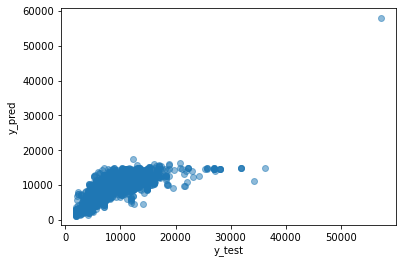

In [64]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 2. Random Forest

In [65]:
# importing RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train, y_train)                                                  

RandomForestRegressor()

In [66]:
# y_pred--> our prediction variable for random forest regressor
y_predict=rfr.predict(X_test)
y_predict

array([16844.13      ,  5354.94      ,  8881.24      , ...,
        6608.26      , 12719.48866667, 13048.97380952])

In [67]:
accu_train2=rfr.score(X_train,y_train)*100
accu_test2=rfr.score(X_test,y_test)*100

In [68]:
print("Accuracy for Traing dataset : ",accu_train2) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test2) # Accuracy for test dataset

Accuracy for Traing dataset :  95.32416654586713
Accuracy for Test dataset :  79.7276504620761


In [69]:
r2=r2_score(y_test,y_predict)*100
print("R2 score for dataset : ",r2)

R2 score for dataset :  79.7276504620761


In [70]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predict)))

MAE: 1181.1361137639851
MSE: 4371135.425598102
RMSE: 2090.726052259861


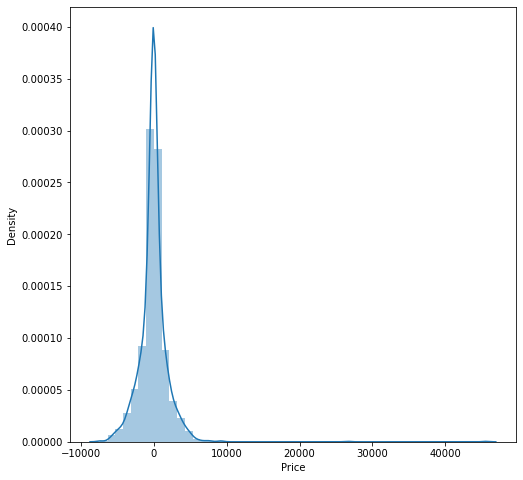

In [71]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_predict)
plt.show()

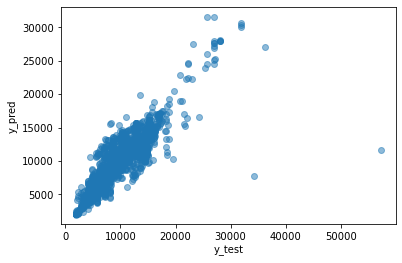

In [72]:
plt.scatter(y_test, y_predict, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 3. XGBoosting 

In [73]:
# Import xgboost library
from xgboost import XGBRegressor
xgb_r=XGBRegressor() ## object creation
xgb_r.fit(X_train,y_train)# fitting the data
y_hat=xgb_r.predict(X_test)#predicting the price
y_hat

array([16784.469 ,  6083.8613,  8152.426 , ...,  5629.0547, 12985.709 ,
       12913.373 ], dtype=float32)

In [74]:
accu_train3=xgb_r.score(X_train,y_train)*100
accu_test3=xgb_r.score(X_test,y_test)*100

In [75]:
print("Accuracy for Traing dataset : ",accu_train3) # Accuracy for training dataset
print("Accuracy for Test dataset : ",accu_test3) # Accuracy for test dataset

Accuracy for Traing dataset :  93.70537985136674
Accuracy for Test dataset :  84.59633442537682


In [76]:
r3=r2_score(y_test,y_hat)*100
print("R2 score for dataset : ",r3)

R2 score for dataset :  84.59633442537682


In [77]:
print('MAE:', metrics.mean_absolute_error(y_test, y_hat)) 
print('MSE:', metrics.mean_squared_error(y_test, y_hat))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_hat)))

MAE: 1126.700124138139
MSE: 3321347.047185769
RMSE: 1822.4563224356762


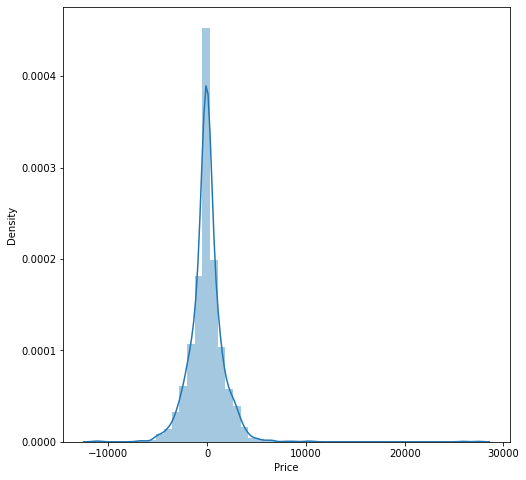

In [78]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-y_hat)
plt.show()

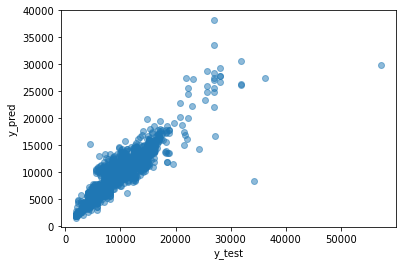

In [79]:
plt.scatter(y_test, y_hat, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## 4. Hyperparameter Tuning¶
There are two techniques of Hyperparameter tuning i.e


1) RandomizedSearchCv 2) GridSearchCV


We use RandomizedSearchCv because it is much faster than GridSearchCV

In [80]:
from sklearn.model_selection import RandomizedSearchCV

# Randomized Search CV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [81]:
# create random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [134]:
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = xgb_r, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [135]:
rf_random .fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   4.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   5.6s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=  10.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
         

In [136]:
# Looking at the best parameters
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 5}

In [137]:
# Prediction variable
prediction = rf_random.predict(X_test)
prediction

array([17277.162 ,  6418.2104,  8282.171 , ...,  6035.2705, 12676.816 ,
       12716.308 ], dtype=float32)

In [138]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1172.215904967719
MSE: 3283917.304967049
RMSE: 1812.1581898297536


In [139]:
r4=r2_score(y_test,prediction)*100
print("R2 score for dataset : ",r4)

R2 score for dataset :  84.76992520751747


In [140]:
# Evaluate on test set
best_model = rf_random.best_estimator_
train_accuracy = best_model.score(X_train, y_train)*100
test_accuracy = best_model.score(X_test, y_test)*100
print("Train Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

Train Accuracy: 95.58317283209121
Test Accuracy: 84.76992520751747


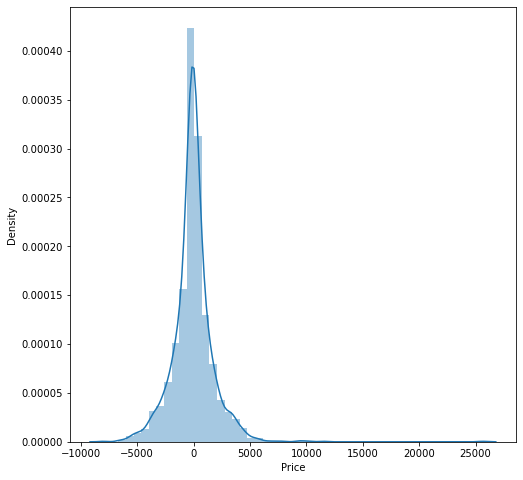

In [141]:
plt.figure(figsize = (8,8))
sns.distplot(y_test-prediction)
plt.show()

##### Gaussian distribution shows our predictions are very good

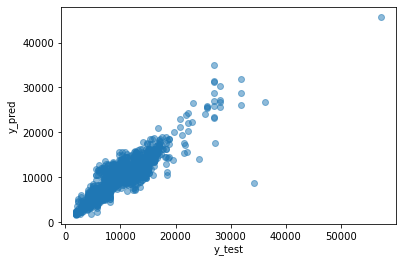

In [142]:
plt.scatter(y_test, prediction, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

## Comparing all the Models

In [143]:
# Comparing all the models
models = pd.DataFrame({
    'Model': [ 'Linear Regression', 'Random Forest Regressor','XGBoost Regressor','Hyperparameter Tuning'],
    'Accuracy_Train': [ accu_train1, accu_train2, accu_train3,train_accuracy],
    'Accuracy_Test':[accu_test1,accu_test2,accu_test3,test_accuracy],
    'R2 Score': [ r1, r2, r3,r4]})
models.sort_values(by='R2 Score', ascending=False)

,Model,Accuracy_Train,Accuracy_Test,R2 Score
3,Hyperparameter Tuning,95.583173,84.769925,84.769925
2,XGBoost Regressor,93.705380,84.596334,84.596334
1,Random Forest Regressor,95.324167,79.727650,79.727650
0,Linear Regression,62.408400,61.959437,61.959437


## Conclusion
By comparing all the models (Linear Regression, Random Forest Regressor, XGBoost Regressor and Hyperparameter Tuning), we can conclude that XGBoost Regressor and Hyperparameter Tuning performs the best.